In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import *
import sklearn

In [2]:
# read data generated from basketball_data.py
pergame_stats_df = pd.read_csv('pergame_stats.csv', skipinitialspace=True)
traded_df = pergame_stats_df.groupby(['Player'])
traded_df = pd.DataFrame(traded_df.size().reset_index(name='trades'))

# pergame_stats_df['Player'] = pergame_stats_df['Player'].apply(clean_jr)
pergame_stats_df = pergame_stats_df.drop_duplicates(subset='Player')

traded_df['trades'] = traded_df['trades'] - 1

df_with_trades = pergame_stats_df.merge(traded_df, on='Player')
df_with_trades = df_with_trades.set_index('Player')

# Looking at Salary Data

salary_df = pd.read_csv('nba_salary.csv', header=1)

# Need to use regex to clean up player name, have to chop off the ...\akljsdlkad01

name = salary_df['Player'][0]
salary_df['Player'] = salary_df['Player'].apply(clean_name)
salary_df['Player'] = salary_df['Player'].apply(clean_jr)
salary_df.columns
salary_df.rename(columns = {'2019-20▼':'2019_Salary'}, inplace=True)
salary_columns = ['Player', '2019_Salary']
salary_df = salary_df[salary_columns]
salary_df = salary_df.set_index('Player')

salary_trade_df = df_with_trades.merge(salary_df, how='left', left_on='Player', right_on='Player')
salary_trade_df = salary_trade_df.dropna()

# the only downside is that I dropped data corresponding to players that have yet to register a %..but I guess that won't really matter as they do not really play anyways

salary_trade_df.head(10)

Pos  Age   Tm   G  GS    MP    FG   FGA    FG%   3P  \
Player                                                                         
Steven Adams               C   26  OKC  58  58  27.0   4.5   7.6  0.591  0.0   
Bam Adebayo               PF   22  MIA  65  65  34.4   6.3  11.1  0.567  0.0   
LaMarcus Aldridge          C   34  SAS  53  53  33.1   7.4  15.0  0.493  1.2   
Nickeil Alexander-Walker  SG   21  NOP  41   0  12.2   1.9   5.5  0.339  1.0   
Grayson Allen             SG   24  MEM  30   0  16.6   2.6   5.9  0.449  1.1   
Jarrett Allen              C   21  BRK  64  58  25.7   4.2   6.5  0.646  0.0   
Al-Farouq Aminu           PF   29  ORL  18   2  21.1   1.4   4.8  0.291  0.5   
Justin Anderson           SF   26  BRK   3   0   5.7   0.3   2.0  0.167  0.0   
Kyle Anderson             PF   26  MEM  59  20  19.3   2.3   4.7  0.493  0.3   
Giannis Antetokounmpo     PF   25  MIL  57  57  30.9  10.9  20.0  0.547  1.5   

                          ...   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
Player                    ...                                              
Steven Adams              ...   6.0   9.4  2.4  0.9  1.1  1.5  1.9  10.9   
Bam Adebayo               ...   8.0  10.5  5.1  1.2  1.3  2.8  2.5  16.2   
LaMarcus Aldridge         ...   5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9   
Nickeil Alexander-Walker  ...   1.8   2.0  1.8  0.3  0.2  1.0  1.1   5.1   
Grayson Allen             ...   2.0   2.2  1.4  0.2  0.0  0.8  1.2   7.4   
Jarrett Allen             ...   6.4   9.5  1.3  0.6  1.3  1.1  2.3  10.6   
Al-Farouq Aminu           ...   3.5   4.8  1.2  1.0  0.4  0.9  1.5   4.3   
Justin Anderson           ...   0.7   0.7  0.0  0.0  0.3  0.0  0.7   1.0   
Kyle Anderson             ...   3.4   4.4  2.2  0.8  0.5  0.9  1.4   5.7   
Giannis Antetokounmpo     ...  11.5  13.7  5.8  1.0  1.0  3.7  3.0  29.6   

                          trades  2019_Salary  
Player                                         
Steven Adams                   0    $25842697  
Bam Adebayo                    0     $3454080  
LaMarcus Aldridge              0    $26000000  
Nickeil Alexander-Walker       0     $2964840  
Grayson Allen                  0     $2429400  
Jarrett Allen                  0     $2376840  
Al-Farouq Aminu                0     $9258000  
Justin Anderson                0       $98144  
Kyle Anderson                  0     $9073050  
Giannis Antetokounmpo          0    $25842697  

[10 rows x 30 columns]

In [3]:
# tackling the multiple instances in the salary_trade_df
# first, going to convert salary information to int32

salary_trade_df['2019_Salary'] = salary_trade_df['2019_Salary'].apply(clean_currency)

In [4]:
salary_trade_df['2019_Salary'] = salary_trade_df['2019_Salary'].astype('float')

In [5]:
# correlation matrix to dataset, see if there's any issues with duplicates.

print(salary_trade_df.corr()[['2019_Salary']])
print(salary_trade_df['TOV'].max())

2019_Salary
Age             0.342621
G               0.220755
GS              0.501755
MP              0.578787
FG              0.632941
FGA             0.636753
FG%             0.117259
3P              0.415529
3PA             0.442753
3P%             0.141573
2P              0.579447
2PA             0.593944
2P%             0.054762
eFG%            0.113272
FT              0.613174
FTA             0.598077
FT%             0.135101
ORB             0.286825
DRB             0.550451
TRB             0.505263
AST             0.563227
STL             0.451914
BLK             0.295128
TOV             0.601332
PF              0.360092
PTS             0.646118
trades         -0.057863
2019_Salary     1.000000
4.8


In [6]:
# Features of interest from dataset with a correlation coefficient of 0.55

print(salary_trade_df.corr()['2019_Salary'] > 0.55)

Age            False
G              False
GS             False
MP              True
FG              True
FGA             True
FG%            False
3P             False
3PA            False
3P%            False
2P              True
2PA             True
2P%            False
eFG%           False
FT              True
FTA             True
FT%            False
ORB            False
DRB             True
TRB            False
AST             True
STL            False
BLK            False
TOV             True
PF             False
PTS             True
trades         False
2019_Salary     True
Name: 2019_Salary, dtype: bool


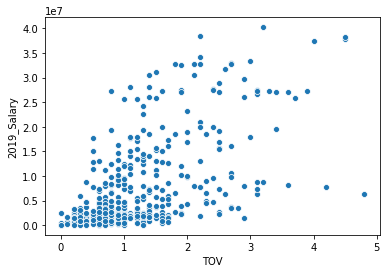

In [7]:
sns.scatterplot(x="TOV", y="2019_Salary", data=salary_trade_df) 

# data is interesting, since "high-usage players (players with a lot of minutes)" tend to turn the ball over more)

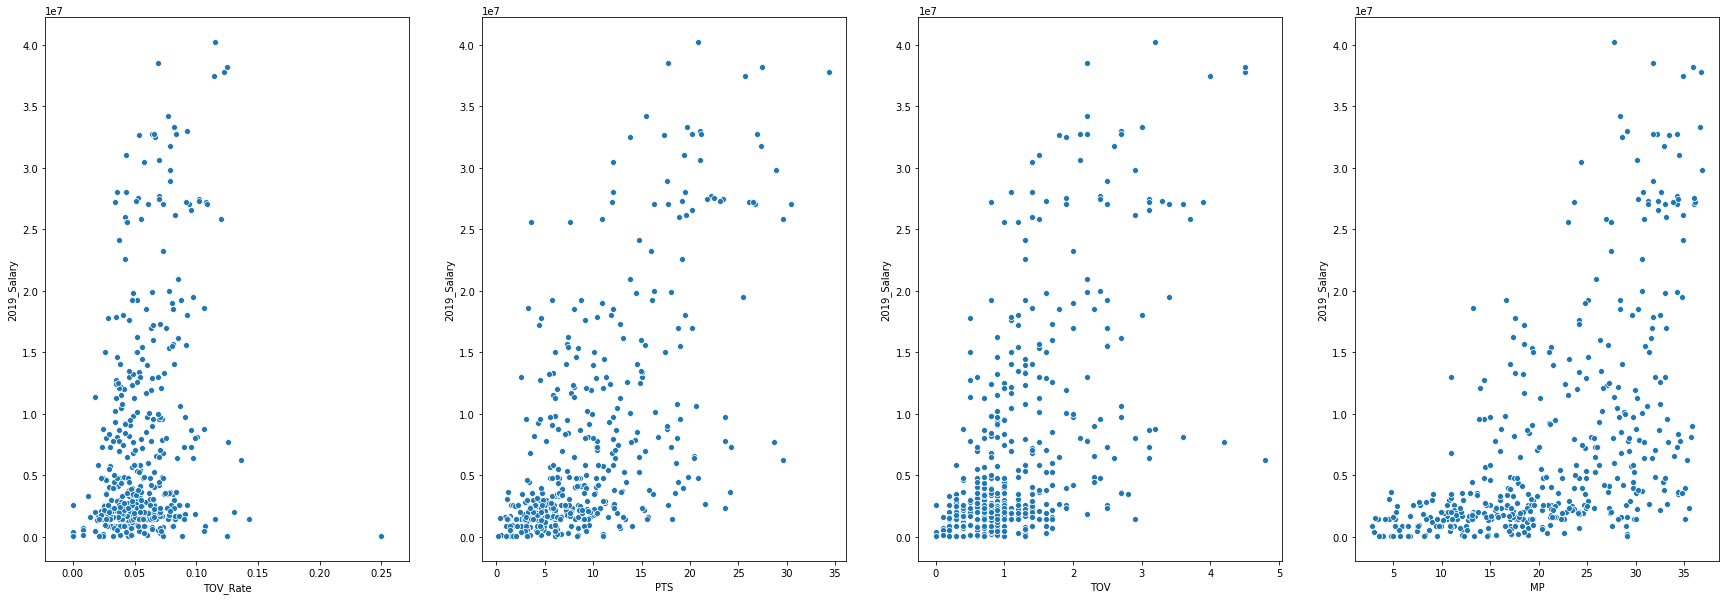

In [8]:
salary_trade_df['TOV_Rate'] = salary_trade_df['TOV']/salary_trade_df['MP']

figs, axs = plt.subplots(ncols=4, figsize=(30,10))
sns.scatterplot(x="TOV_Rate", y="2019_Salary", data=salary_trade_df, ax=axs[0])
sns.scatterplot(x="PTS", y="2019_Salary", data=salary_trade_df, ax=axs[1])
sns.scatterplot(x="TOV", y="2019_Salary", data=salary_trade_df, ax=axs[2])
sns.scatterplot(x="MP", y="2019_Salary", data=salary_trade_df, ax=axs[3])
#sns.distplot(salary_trade_df['TOV_Rate'], bins=20, kde=False, ax=axs[3])
#sns.distplot(salary_trade_df['2019-20'], bins=20, kde=False, ax=axs[4])


In [9]:
# sns pairplot too slow, need to trim the data a bit
# sns.pairplot(salary_trade_df)# 

In [10]:
# Explore more unique visualizations from the merged dataset
# Build out more unique features and see if

salary_trade_df.corr()['MP']

Age            0.119341
G              0.576806
GS             0.785164
MP             1.000000
FG             0.866231
FGA            0.878156
FG%            0.223153
3P             0.658383
3PA            0.672047
3P%            0.325491
2P             0.750361
2PA            0.778835
2P%            0.145137
eFG%           0.289036
FT             0.692487
FTA            0.689815
FT%            0.201218
ORB            0.364059
DRB            0.703367
TRB            0.643796
AST            0.697315
STL            0.711637
BLK            0.328376
TOV            0.776874
PF             0.710252
PTS            0.864384
trades        -0.164350
2019_Salary    0.578787
TOV_Rate       0.210280
Name: MP, dtype: float64

In [11]:
# descriptive statistics summary
salary_trade_df['2019_Salary'].describe()

count    4.420000e+02
mean     7.517397e+06
std      8.890268e+06
min      5.075200e+04
25%      1.645357e+06
50%      3.447040e+06
75%      9.950000e+06
max      4.023176e+07
Name: 2019_Salary, dtype: float64

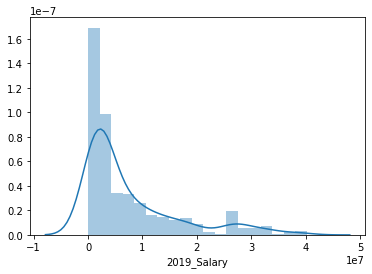

In [12]:
# histogram
sns.distplot(salary_trade_df['2019_Salary'])

# Salary deviates from the normal distribution
# Have appreciable positive skewness
# Show peakedness

In [13]:
# skewness and kurtosis

print("Skewness: %f" % salary_trade_df['2019_Salary'].skew())
print("Kurtosis: %f" % salary_trade_df['2019_Salary'].kurt())

Skewness: 1.674164
Kurtosis: 2.021633


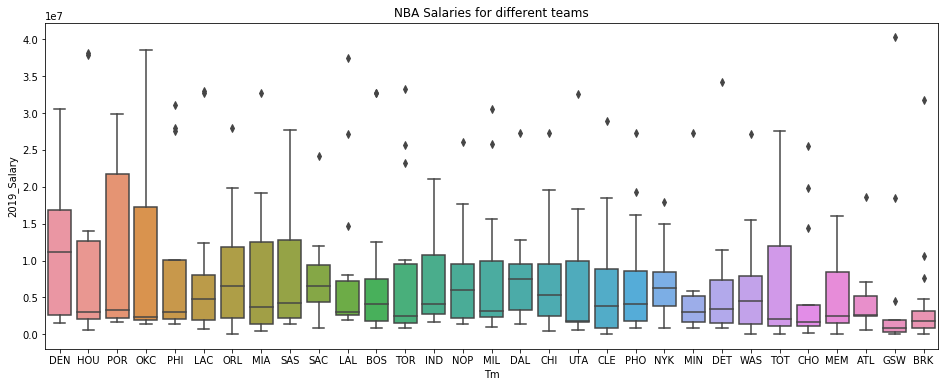

In [14]:
#box plot of salary and teams in nba (32)
var = 'Tm'
ranks = salary_trade_df.groupby("Tm")['2019_Salary'].mean().fillna(0).sort_values()[::-1].index
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=var, y='2019_Salary', data=salary_trade_df, order=ranks).set_title("NBA Salaries for different teams")
#fig.axis(ymin=0, ymax=800000);

# Not entirely representative of salary cap, as this does not cover the injured players who have not recorded a statistic this season

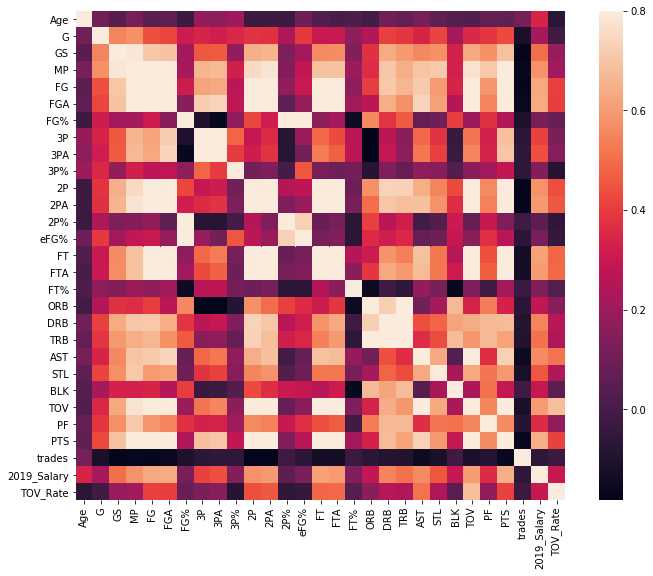

In [15]:
#correlation matrix
corr_matrix = salary_trade_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

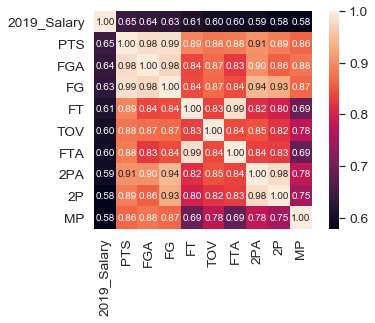

In [16]:
# top 10 correlation matrix
k = 10  #number of variables for heatmap
cols = corr_matrix.nlargest(k, '2019_Salary')['2019_Salary'].index
cm = np.corrcoef(salary_trade_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

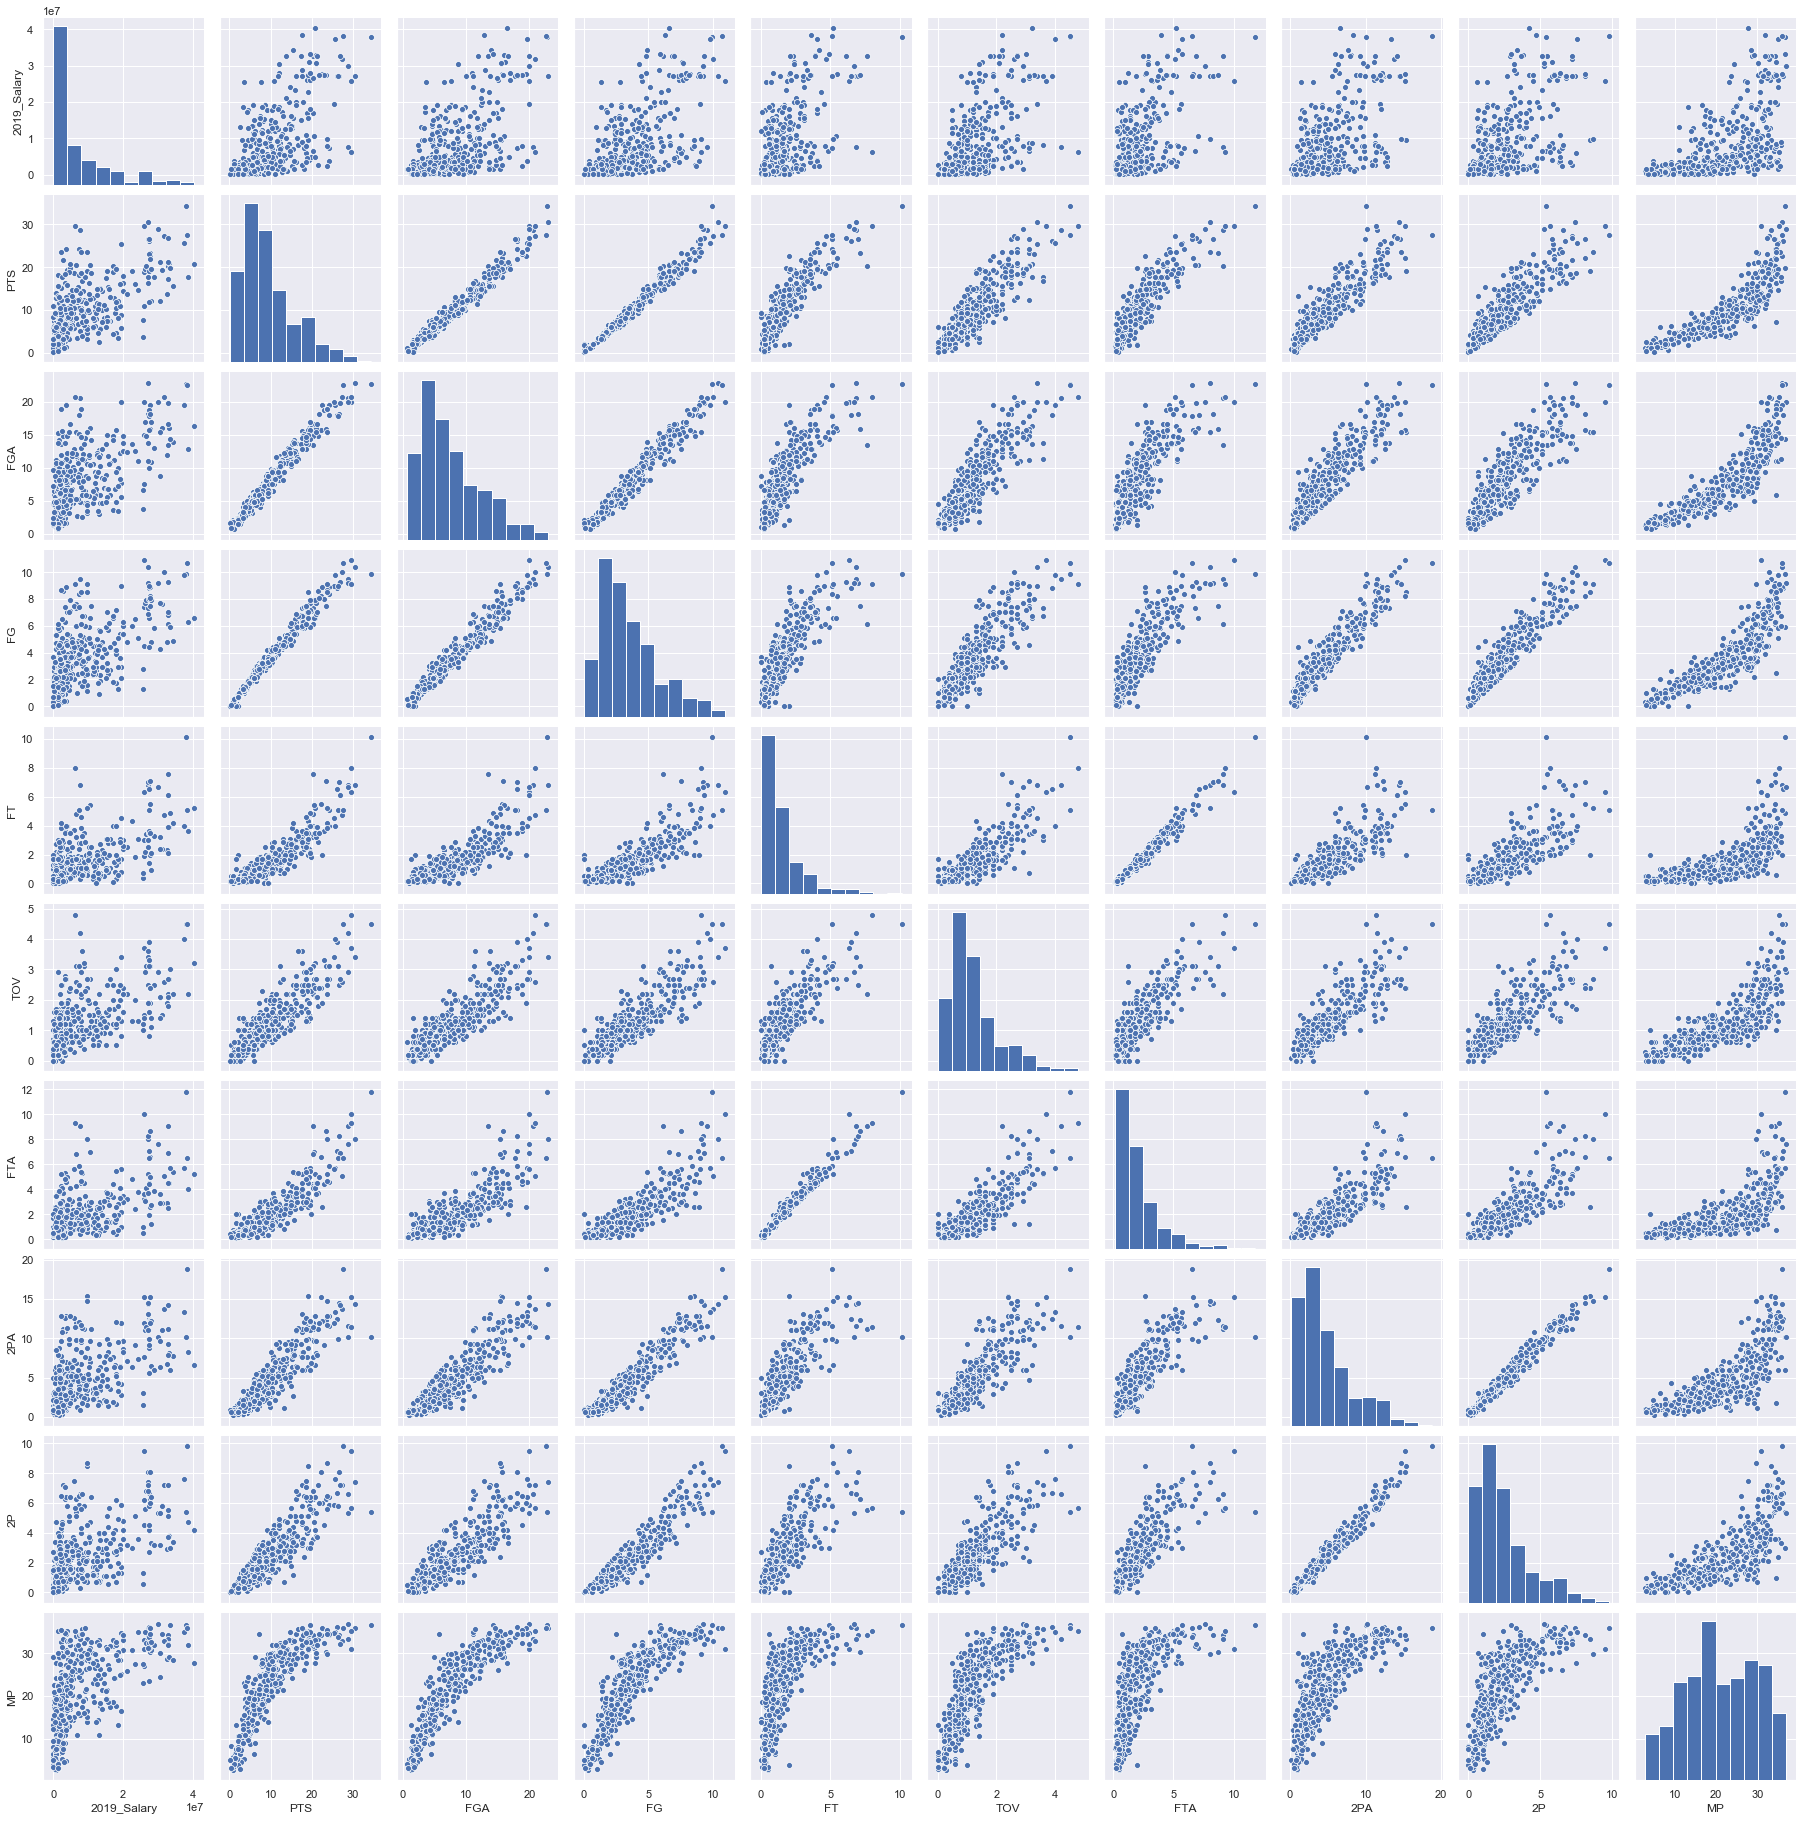

In [17]:
#scatterplot depicting the pairwise relationships between the top 10 variables
sns.set()
cols = ['2019_Salary','PTS', 'FGA', 'FG', 'FT', 'TOV', 'FTA', '2PA', '2P', 'MP']
sns.pairplot(salary_trade_df[cols], height = 2.5)

In [18]:
# trying out a Linear Regression model

target_y = salary_trade_df['2019_Salary']
model_df = salary_trade_df.drop(['Pos', 'Tm', '2019_Salary'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_df, target_y)

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 28)
(331,)
(111, 28)
(111,)


In [20]:
model = linear_reg.fit(X_train, y_train)

In [21]:
predictions = model.predict(X_test)

In [22]:
print(predictions[0:10])

[ 5021765.30076924  4105481.33917508  3308685.76604213  2585883.84578728
  8806916.90035067  8192884.9658771  12864650.33481126 12617446.74457445
  6804017.27451513  9602617.03508891]


In [23]:
y_test[0:10]

Player
Jerami Grant        9346153.0
De'Andre Hunter     7068360.0
Austin Rivers       2174318.0
Edmond Sumner       2000000.0
Cody Zeller        14471910.0
Gary Harris        17839286.0
Elfrid Payton       8000000.0
Goran Dragić       19217900.0
Brandon Clarke      2478840.0
Dion Waiters         503656.0
Name: 2019_Salary, dtype: float64

In [24]:
# Review this when more time is available: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

# and this one: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [25]:
residual = predictions - y_test

linear_regression_diff= pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residual': residual})

In [26]:
linear_regression_diff.nlargest(60, 'Residual')

Actual     Predicted      Residual
Player                                                         
Domantas Sabonis          3529555.0  1.788331e+07  1.435375e+07
Alec Burks                2320044.0  1.538194e+07  1.306189e+07
Shai Gilgeous-Alexander   3952920.0  1.485648e+07  1.090356e+07
Shabazz Napier            1882867.0  1.274213e+07  1.085926e+07
Damion Lee                 842327.0  1.083480e+07  9.992477e+06
Lou Williams              8000000.0  1.793584e+07  9.935837e+06
Jamal Murray              4444746.0  1.398033e+07  9.535585e+06
Dion Waiters               503656.0  9.602617e+06  9.098961e+06
Vince Carter              2564753.0  1.162422e+07  9.059467e+06
JaVale McGee              4000000.0  1.262159e+07  8.621594e+06
Kyle O'Quinn              2028594.0  9.317237e+06  7.288643e+06
Marvin Williams            956349.0  7.830723e+06  6.874374e+06
Kendrick Nunn             1416852.0  8.012224e+06  6.595372e+06
Luke Kennard              3827160.0  1.036348e+07  6.536316e+06
Josh Magette                81678.0  6.148124e+06  6.066446e+06
Willie Cauley-Stein       2177483.0  8.165066e+06  5.987583e+06
Nerlens Noel              2028594.0  7.453269e+06  5.424675e+06
Will Barton              12960000.0  1.837373e+07  5.413726e+06
Dwight Howard             3039097.0  8.273927e+06  5.234830e+06
Deandre Ayton             9562920.0  1.474826e+07  5.185338e+06
Elfrid Payton             8000000.0  1.286465e+07  4.864650e+06
Anthony Tolliver          2419852.0  7.136527e+06  4.716675e+06
Aron Baynes               5453280.0  9.971032e+06  4.517752e+06
Collin Sexton             4764960.0  9.100828e+06  4.335868e+06
Brandon Clarke            2478840.0  6.804017e+06  4.325177e+06
Ben Simmons               8113930.0  1.242862e+07  4.314689e+06
T.J. McConnell            3500000.0  7.516553e+06  4.016553e+06
Thanasis Antetokounmpo    1445697.0  5.444521e+06  3.998824e+06
Kyle Kuzma                1974600.0  5.769380e+06  3.794780e+06
Monte Morris              1588231.0  4.974823e+06  3.386592e+06
Brad Wanamaker            1445697.0  4.814647e+06  3.368950e+06
Jalen Brunson             1416582.0  4.533212e+06  3.116630e+06
Aaron Holiday             2239200.0  5.236219e+06  2.997019e+06
Donte DiVincenzo          2905800.0  5.820609e+06  2.914809e+06
Ky Bowman                  350189.0  3.224167e+06  2.873978e+06
James Ennis               1882867.0  4.715913e+06  2.833046e+06
Trey Burke                2028594.0  4.788408e+06  2.759814e+06
Robert Covington         11301219.0  1.396054e+07  2.659326e+06
Troy Daniels               481000.0  2.999231e+06  2.518231e+06
Luke Kornet               2195122.0  4.698077e+06  2.502955e+06
Bryn Forbes               2875000.0  5.274756e+06  2.399756e+06
Brandon Goodwin            522738.0  2.706006e+06  2.183268e+06
Alfonzo McKinnie           708871.0  2.840033e+06  2.131162e+06
Noah Vonleh               2000000.0  3.967297e+06  1.967297e+06
Sterling Brown            1618520.0  3.455270e+06  1.836750e+06
Patrick Patterson         2331593.0  3.971775e+06  1.640182e+06
Pat Connaughton           1723050.0  3.334380e+06  1.611330e+06
Duncan Robinson           1416852.0  2.823625e+06  1.406773e+06
Kris Dunn                 5348007.0  6.510858e+06  1.162851e+06
Austin Rivers             2174318.0  3.308686e+06  1.134368e+06
Taj Gibson                9800000.0  1.084516e+07  1.045163e+06
Jaylen Nowell             1400000.0  2.233259e+06  8.332589e+05
Jarrod Uthoff               81678.0  7.417831e+05  6.601051e+05
Edmond Sumner             2000000.0  2.585884e+06  5.858838e+05
DeAndre' Bembry           2603982.0  3.054303e+06  4.503212e+05
Gary Clark                 708426.0  1.076883e+06  3.684568e+05
Mikal Bridges             4161000.0  4.526025e+06  3.650250e+05
Nicolas Claxton            898310.0  9.214033e+05  2.309331e+04
Rodney Hood               5718000.0  5.734938e+06  1.693760e+04
Rudy Gay                 14000000.0  1.398223e+07 -1.777347e+04

In [27]:
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 4301515.460015619
Mean Squared Error: 32772166285013.523
Root Mean Squared Error: 5724697.920852551


In [28]:
# Pushed to GitHub with this folder on 5/3/2020

# Items to accomplish
# [1] Clean up this notebook, and figure out how to add markdown via visual studio
# [2] Add commentary to guide myself and any readers that come across this
# [3] Take down notes on how to init, add, commit, and push to repo
# [4] Add commentary and discussion on methodology of various ML algorithms
# [5] Build a template for project building for future projects